In [ ]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [ ]:
import os

# Set this to the number of physical cores you want to use
os.environ["LOKY_MAX_CPU_COUNT"] = "10"

In [ ]:
df_HCC = pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T
print("Dataframe dimensions:", np.shape(df_HCC))

df_MCF7 = pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T
print("Dataframe dimensions:", np.shape(df_MCF7))

<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
C:\Users\flamo\AppData\Local\Temp\ipykernel_9616\803403547.py:1: SyntaxWarning: invalid escape sequence '\ '
  df_HCC = pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T
C:\Users\flamo\AppData\Local\Temp\ipykernel_9616\803403547.py:4: SyntaxWarning: invalid escape sequence '\ '
  df_MCF7 = pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T


Dataframe dimensions: (14682, 3000)
Dataframe dimensions: (21626, 3000)


### Blidnly applying DBSCAN and k-means to the two datasets, gives very poor results

DBSCAN to find natural number of clusters in the dataset and noise data points, e.g. outliers, while k-means for understanding how easily the two clusters can be separated

In [ ]:
# Preprocessing: Standardize the features
scaler = StandardScaler()
data_scaled_HCC = scaler.fit_transform(df_HCC.values)
data_scaled_MCF7 = scaler.fit_transform(df_MCF7.values)

In [ ]:
#extract labels so that for algorithms which surely return two clusters, like k-means, one can evaluate them by
#finding the accuracy, defined as the highest (bettween acc and 1-acc) or th one with the highest overlap of correctly classified
# oints according to true labels

sample_names = df_HCC.T.columns
conditions = []
for name in sample_names:
    if "Norm" in name:
        conditions.append("Norm")
    elif "Hypo" in name:
        conditions.append("Hypo")
    else:
        conditions.append("Unknown")

colors_HCC = ["blue" if c == "Norm" else "red" if c == "Hypo" else "gray" for c in conditions]
condition_labels_HCC = np.array([0 if c == "Norm" else 1 if c == "Hypo" else 2 for c in conditions])

sample_names = df_MCF7.T.columns
conditions = []
for name in sample_names:
    if "Norm" in name:
        conditions.append("Norm")
    elif "Hypo" in name:
        conditions.append("Hypo")
    else:
        conditions.append("Unknown")

colors_MCF7 = ["blue" if c == "Norm" else "red" if c == "Hypo" else "gray" for c in conditions]
condition_labels_MCF7 = np.array([0 if c == "Norm" else 1 if c == "Hypo" else 2 for c in conditions])

### PARAMETERS and standardisation

DBSCAN to find natural number of clusters in the dataset and noise data points, e.g. outliers, while k-means for understanding how easily the two clusters can be separated

In [ ]:
#parameters to be tried for DBSCAN
eps_values = [ 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.9, 1]
min_samples_values = [ 5, 10, 25, 50, 75, 100]

#parameters to be tried for k-means
initialisations = ['k-means++', 'random']
n_init = [1,5,10]
tolerances = [1e-5, 1e-4, 1e-3, 1e-2, 0.1]

## Blindly applying DBSCAN and k-means to the two datasets, gives very poor results

In [ ]:
print("HCC186 dataset")
# apply dbscan to raw standardized data to see results
for eps in eps_values:
    for min_samples in min_samples_values:
        db_HCC = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=10).fit(data_scaled_HCC)
        labels = db_HCC.labels_


        n_clusters_H = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_H = list(labels).count(-1)
        noise_ratio_H = n_noise_H / len(labels)

        print(f"eps={eps:.2f}, min_samples={min_samples} --> "
              f"clusters: {n_clusters_H}, noise points: {n_noise_H} ({noise_ratio_H * 100:.2f}%)")

print("MCF7 dataset")
for eps in eps_values:
    for min_samples in min_samples_values:
        db_MCF7 = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=10).fit(data_scaled_MCF7)
        labels = db_MCF7.labels_


        n_clusters_M = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_M = list(labels).count(-1)
        noise_ratio_M = n_noise_M / len(labels)

        print(f"eps={eps:.2f}, min_samples={min_samples} --> "
              f"clusters: {n_clusters_M}, noise points: {n_noise_M} ({noise_ratio_M * 100:.2f}%)")

HCC186 dataset
eps=0.10, min_samples=3 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=5 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=10 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=15 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=20 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=30 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.10, min_samples=50 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=3 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=5 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=10 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=15 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=20 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=30 --> clusters: 0, noise points: 14682 (100.00%)
eps=0.20, min_samples=50 --> clusters: 0, noise point

The % of noisy observations detected by DBSCAN is always close to, if not exactly, to 100% since the dataset is very sparse so it cannot identify areas of high density vs low density as for lower-dimensional data. Thus Dimensionality reduction before applying DBSCAN could be very important

Moreover, also the range of parameters for min_samples and eps is very important in affecting performance so that a Nearest Neighbour graph will be used, as in the literature, to select qualitatively the range of values for which to run DBSCAN. eps: value at the elbow of the k-distance plot.

In [ ]:
# apply k-means to raw standardized data to see results
print("HCC186 dataset")
for init in initialisations:
    for n in n_init:
        for tol in tolerances:
            kmeans_HCC = KMeans(n_clusters=2, tol=tol, init=init, n_init=n).fit(data_scaled_HCC)
            labels = kmeans_HCC.labels_

            print(f"tol={tol}, n_init={init}, initialisation={init} --> "
                    f"silhouette score = {silhouette_score(data_scaled_HCC, labels)}")

print("MCF7 dataset")
for init in initialisations:
    for n in n_init:
        for tol in tolerances:
            kmeans_MCF7 = KMeans(n_clusters=2, tol=tol, init=init, n_init=n).fit(data_scaled_MCF7)
            labels = kmeans_MCF7.labels_

            print(f"tol={tol}, n_init={init}, initialisation={init} --> "
                    f"silhouette score = {silhouette_score(data_scaled_MCF7, labels)}")

HCC186 dataset


Accuracy around 50% for all parameters shows that k-means cannot find any true clusters and classifies randomly, like a dummy classifier, either because of non-convex clusters or due to high-dimensionality

# APPPLY PCA and UMAP to reduce dimensionality and sparsity issues

In [ ]:
#rule of thumb for UMAP components, usually root or log of number of columns

In [ ]:
#HCC dataset transfomrations
n = 2600 # number of components to keep/use based on results of PCA

# plot of PCs vs ratio of explained variance
print(f"Computing PCA with {n} components...")
pca_HCC = PCA(n_components=n, random_state=42)
reduced_featuers_HCC = pca_HCC.fit_transform(data_scaled_HCC)

# Compute UMAP embedding
print(f"Computing UMAP with 100 components...")
#umap_alg = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=n, random_state=42) #naive parameters without any optimsiation
umap_alg_HCC = umap.UMAP(n_neighbors=11, min_dist=0.204, metric = "correlation", n_components=100, random_state=42) #optimised parameters with KNN
umap_embedding_HCC = umap_alg_HCC.fit_transform(df_HCC.values)

Computing PCA with 2600 components...
Computing UMAP with 100 components...


c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
#MCF7 dataset transformations
n = 2250 # number of components to keep/use based on results of PCA

# plot of PCs vs ratio of explained variance
print(f"Computing PCA with {n} components...")
pca_MCF7 = PCA(n_components=n, random_state=42)
reduced_featuers_MCF7 = pca_MCF7.fit_transform(data_scaled_MCF7)

# Compute UMAP embedding
print(f"Computing UMAP with 100 components...")
#umap_alg = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=n, random_state=42) #naive parameters without any optimsiation
umap_alg_MCF7 = umap.UMAP(n_neighbors=12, min_dist=1.0, metric = "cosine", n_components=100, random_state=42) #optimised parameters with KNN
umap_embedding_MCF7 = umap_alg_MCF7.fit_transform(df_MCF7.values)

Computing PCA with 2250 components...
Computing UMAP with 100 components...


c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# CLUSTERING ALGORITHMS AFTER PCA

In [ ]:
print("DBSCAN FOR MCF7 dataset")
# dbscan after PCA
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(reduced_featuers_MCF7)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        print(f"eps={eps:.2f}, min_samples={min_samples} --> "
              f"clusters: {n_clusters}, noise points: {n_noise} ({noise_ratio * 100:.2f}%)")

print("DBSCAN FOR HCC dataset")
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(reduced_featuers_HCC)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        print(f"eps={eps:.2f}, min_samples={min_samples} --> "
              f"clusters: {n_clusters}, noise points: {n_noise} ({noise_ratio * 100:.2f}%)")

DBSCAN FOR MCF7 dataset
eps=0.10, min_samples=5 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.10, min_samples=10 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.10, min_samples=25 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.10, min_samples=50 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.15, min_samples=5 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.15, min_samples=10 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.15, min_samples=25 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.15, min_samples=50 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.20, min_samples=5 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.20, min_samples=10 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.20, min_samples=25 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.20, min_samples=50 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.25, min_samples=5 --> clusters: 0, noise points: 21626 (100.00%)
eps=0.25, min_samples=10 --> clusters: 0, no

In [ ]:
# apply k-means to raw standardized data to see results
print("HCC186 dataset")
for init in initialisations:
    for n in n_init:
        for tol in tolerances:
            kmeans_HCC = KMeans(n_clusters=2, tol=tol, init=init, n_init=n).fit(reduced_featuers_HCC)
            labels = kmeans_HCC.labels_

            print(f"tol={tol}, n_init={n}, initialisation={init} --> "
                    f"silhouette score = {silhouette_score(reduced_featuers_HCC, labels)}")

print("MCF7 dataset")
for init in initialisations:
    for n in n_init:
        for tol in tolerances:
            kmeans_MCF7 = KMeans(n_clusters=2, tol=tol, init=init, n_init=n).fit(reduced_featuers_MCF7)
            labels = kmeans_MCF7.labels_

            print(f"tol={tol}, n_init={n}, initialisation={init} --> "
                    f"silhouette score: {silhouette_score(reduced_featuers_MCF7, labels)}")

HCC186 dataset
tol=1e-05, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.22310827796420338
tol=0.0001, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.26098405639440886
tol=0.001, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.21261124909779983
tol=0.01, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.13514657875931607
tol=0.1, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.19074747913822201
tol=1e-05, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.006988156804575523
tol=0.0001, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.1640945000706269
tol=0.001, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.0057072399396623065
tol=0.01, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.005904270526177651
tol=0.1, n_init=k-means++, initialisation=k-means++ --> silhouette score = 0.11011664458448514
tol=1e-05, n_ini

There is no visible improvement compared to dbscan or kmeans on standardized data, namely DBSCAN can distinguish only one cluster of data and also k-means appears to do the same as can be seen from silhouette score.

# CLUSTERING ALGORITHMS AFTER UMAP

### DBSCAN

In [ ]:
#parameters to be tried for DBSCAN
eps_values = [ 0.3, 0.5, 0.7, 0.9, 1, 1.05, 1.1, 1.15, 1.2]
min_samples_values = [ 5, 10, 25, 50, 75, 100]
results_dbscan_MCF7 = []

print("DBSCAN FOR MCF7 dataset")
# MCF7 dbscan after umap
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(umap_embedding_MCF7)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        try:
            core_data = umap_embedding_MCF7[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan
            db_score = np.nan

        results_dbscan_MCF7.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
        })

        #print(f"eps={eps:.2f}, min_samples={min_samples} --> "
        #      f"clusters: {n_clusters}, noise points: {n_noise} ({noise_ratio * 100:.2f}%)")
        #if n_clusters ==2:
        #    print(f"accuracy: {1-accuracy_score( condition_labels_MCF7[labels != -1], labels[labels != -1])}") # accuracy out of those not considered noise

results_dbscan_df_M = pd.DataFrame(results_dbscan_MCF7)
results_dbscan_df_M.iloc[-20:,:]

DBSCAN FOR MCF7 dataset


eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette
34  1.05           75           2     6426     0.297142   -0.145898
35  1.05          100           7    10720     0.495700    0.351559
36  1.10            5           1       16     0.000740         NaN
37  1.10           10           1       61     0.002821         NaN
38  1.10           25           1      563     0.026033         NaN
39  1.10           50           1     1999     0.092435         NaN
40  1.10           75           1     3587     0.165865         NaN
41  1.10          100           2     6334     0.292888   -0.026203
42  1.15            5           1        3     0.000139         NaN
43  1.15           10           1        8     0.000370         NaN
44  1.15           25           1      197     0.009109         NaN
45  1.15           50           1      946     0.043744         NaN
46  1.15           75           1     2025     0.093637         NaN
47  1.15          100           1     3430     0.158605         NaN
48  1.20            5           1        1     0.000046         NaN
49  1.20           10           1        2     0.000092         NaN
50  1.20           25           1       43     0.001988         NaN
51  1.20           50           1      336     0.015537         NaN
52  1.20           75           1      971     0.044900         NaN
53  1.20          100           1     1822     0.084250         NaN

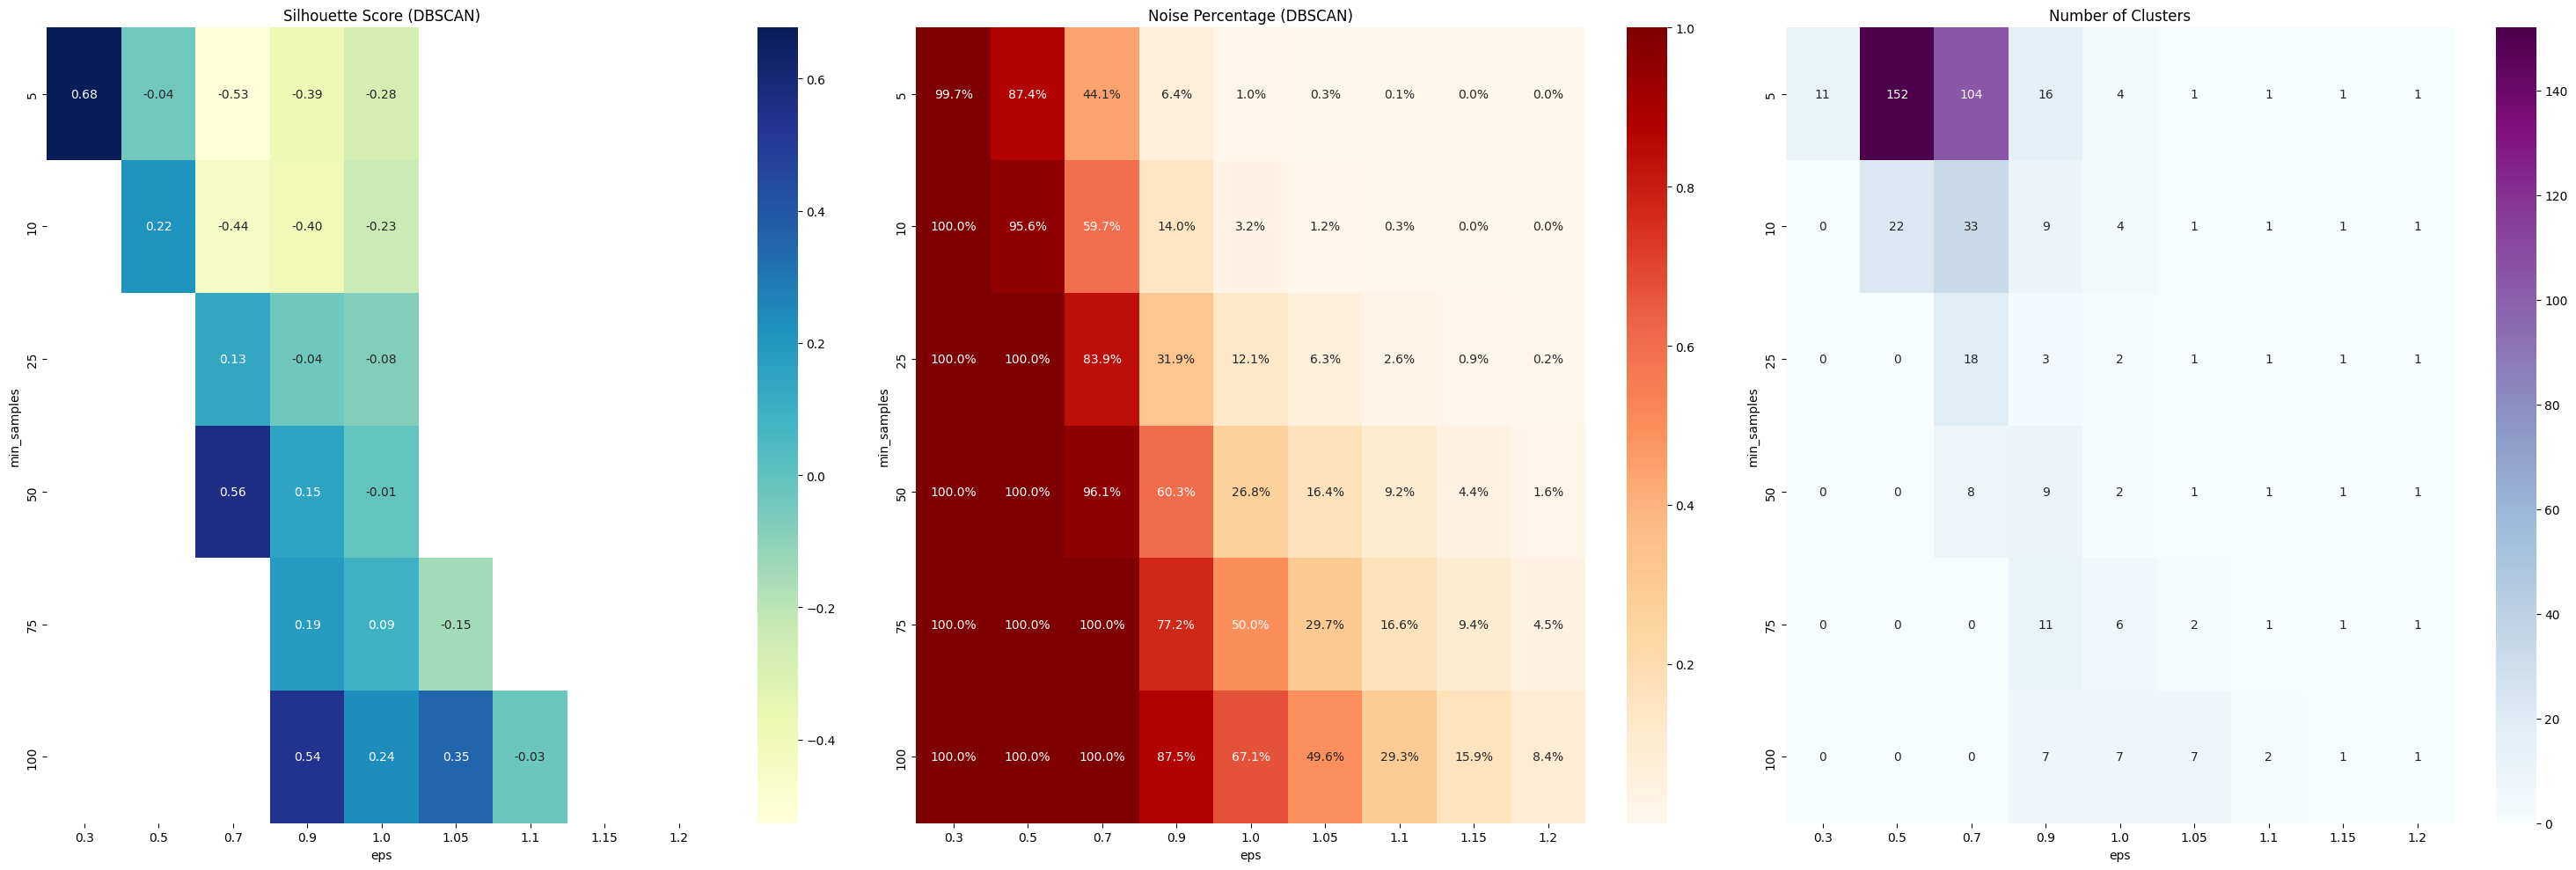

In [ ]:
pivot_sil = results_dbscan_df_M.pivot(index='min_samples', columns='eps', values='silhouette')
pivot_noise = results_dbscan_df_M.pivot(index='min_samples', columns='eps', values='noise_ratio')
pivot_clusters = results_dbscan_df_M.pivot(index='min_samples', columns='eps', values='n_clusters')

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot 1: Silhouette Score (DBSCAN)
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Silhouette Score (DBSCAN)')
axes[0].set_xlabel('eps')
axes[0].set_ylabel('min_samples')

# Plot 2: Noise Percentage
sns.heatmap(pivot_noise, annot=True, fmt=".1%", cmap="OrRd", ax=axes[1])
axes[1].set_title('Noise Percentage (DBSCAN)')
axes[1].set_xlabel('eps')
axes[1].set_ylabel('min_samples')

#Plot 3: Number of Clusters
sns.heatmap(pivot_clusters, annot=True, fmt="d", cmap="BuPu", ax = axes[2])
axes[2].set_title('Number of Clusters')
axes[2].set_xlabel('eps')
axes[2].set_ylabel('min_samples')

plt.tight_layout()
plt.show()

In [ ]:
eps_values = [ 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.9, 1, 1.1]
min_samples_values = [ 5, 10, 25, 50, 75, 100]
results_dbscan_HCC = []
# HCC dbscan after umap
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(umap_embedding_HCC)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        try:
            core_data = umap_embedding_HCC[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan
            db_score = np.nan

        results_dbscan_HCC.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
        })

        # print(f"eps={eps:.2f}, min_samples={min_samples} --> "
        #       f"clusters: {n_clusters}, noise points: {n_noise} ({noise_ratio * 100:.2f}%)")
        # if n_clusters ==2:
        #     print(f"accuracy: {accuracy_score( condition_labels_HCC[labels != -1], labels[labels != -1])}")

results_dbscan_df_H = pd.DataFrame(results_dbscan_HCC)
results_dbscan_df_H.iloc[-20:,:]

eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette
58  0.7           75           1      117     0.007969         NaN
59  0.7          100           1      178     0.012124         NaN
60  0.9            5           1        0     0.000000         NaN
61  0.9           10           1        0     0.000000         NaN
62  0.9           25           1        0     0.000000         NaN
63  0.9           50           1        0     0.000000         NaN
64  0.9           75           1        0     0.000000         NaN
65  0.9          100           1        1     0.000068         NaN
66  1.0            5           1        0     0.000000         NaN
67  1.0           10           1        0     0.000000         NaN
68  1.0           25           1        0     0.000000         NaN
69  1.0           50           1        0     0.000000         NaN
70  1.0           75           1        0     0.000000         NaN
71  1.0          100           1        0     0.000000         NaN
72  1.1            5           1        0     0.000000         NaN
73  1.1           10           1        0     0.000000         NaN
74  1.1           25           1        0     0.000000         NaN
75  1.1           50           1        0     0.000000         NaN
76  1.1           75           1        0     0.000000         NaN
77  1.1          100           1        0     0.000000         NaN

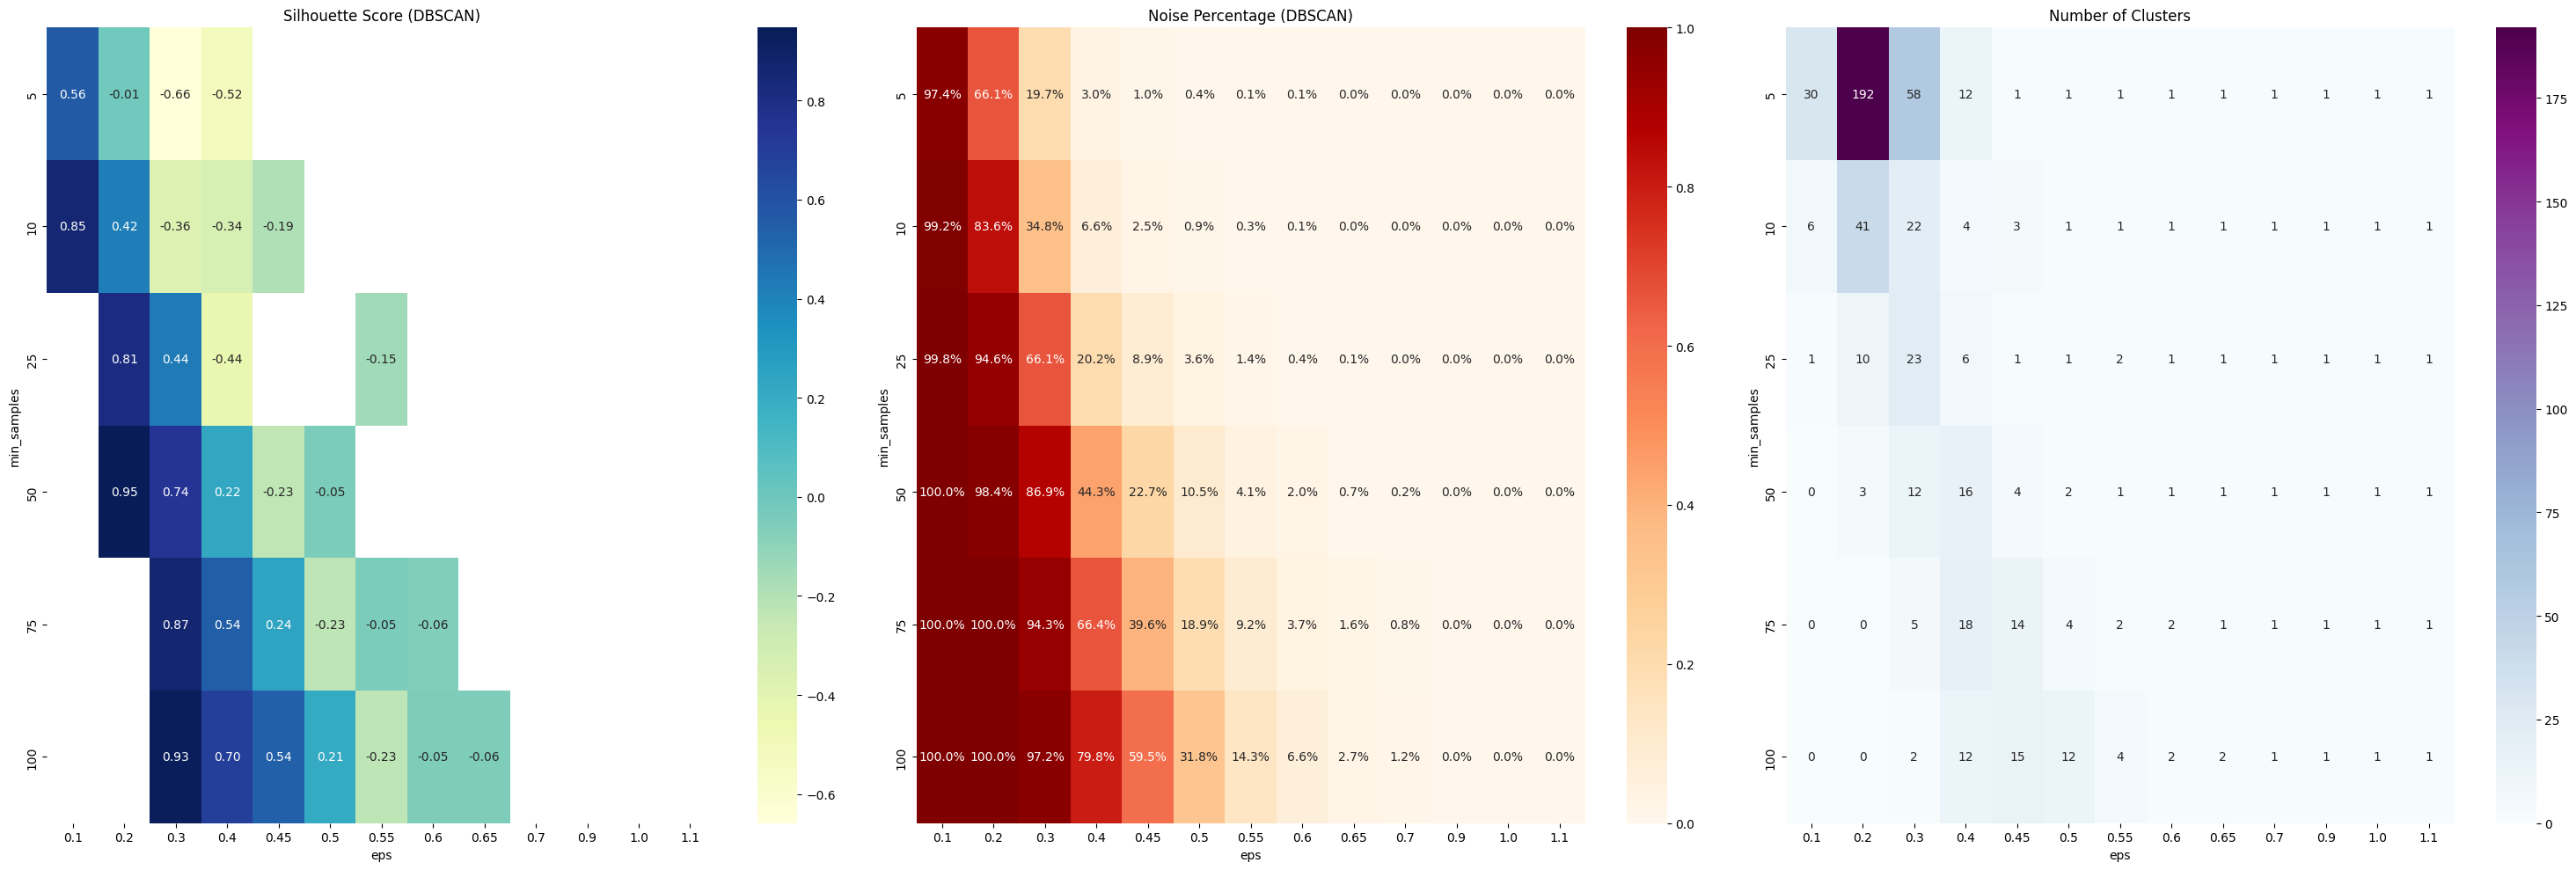

In [ ]:
pivot_sil = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='silhouette')
pivot_noise = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='noise_ratio')
pivot_clusters = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='n_clusters')

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot 1: Silhouette Score (DBSCAN)
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Silhouette Score (DBSCAN)')
axes[0].set_xlabel('eps')
axes[0].set_ylabel('min_samples')

# Plot 2: Noise Percentage
sns.heatmap(pivot_noise, annot=True, fmt=".1%", cmap="OrRd", ax=axes[1])
axes[1].set_title('Noise Percentage (DBSCAN)')
axes[1].set_xlabel('eps')
axes[1].set_ylabel('min_samples')

#Plot 3: Number of Clusters
sns.heatmap(pivot_clusters, annot=True, fmt="d", cmap="BuPu", ax = axes[2])
axes[2].set_title('Number of Clusters')
axes[2].set_xlabel('eps')
axes[2].set_ylabel('min_samples')

plt.tight_layout()
plt.show()

### K-means

In [ ]:
results_kmeans_HCC = []

# apply k-means to raw standardized data to see results
print("HCC186 dataset")
for init in initialisations:
    for n in n_init:
        k_mean = KMeans( n_clusters=2, init= init, n_init=n, random_state=20)
        k_mean.fit(umap_embedding_HCC)
        labels = k_mean.labels_

        try:
            core_data = umap_embedding_HCC[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan

        results_kmeans_HCC.append({
            'n_init': n,
            "initialisations": init,
            'silhouette': silhouette,
            'accuracy' : max(1-accuracy_score(condition_labels_HCC, labels), accuracy_score( condition_labels_HCC, labels))
        })

            # print(f"max={max}, tol={tol} --> "
            #     f" Normoxia: {n_0}, Hypoxia: {n_1}, ratio: {n_0/(n_0+n_1)}, samples_diff: {n_0-n_1}")
            # #print(f"accuracy: {(min(sum(labels), sum(condition_labels))+min(n_0,sum(1-condition_labels)))/len(labels)}")
            # print(f"accuracy: {max(1-accuracy_score(condition_labels_HCC, labels), accuracy_score(condition_labels_HCC, labels))}")

results_kmeans_df_H = pd.DataFrame(results_kmeans_HCC)
results_kmeans_df_H.iloc[-20:,:]

HCC186 dataset


n_init initialisations  silhouette  accuracy
0       1       k-means++    0.485816  0.569064
1       5       k-means++    0.485816  0.569064
2      10       k-means++    0.485807  0.568928
3       1          random    0.485810  0.568996
4       5          random    0.485807  0.568928
5      10          random    0.485807  0.568928

In [ ]:
results_kmeans_MCF7 = []

# apply k-means to raw standardized data to see results
print("MCF7 dataset")
for init in initialisations:
    for n in n_init:
        k_mean = KMeans( n_clusters=2, init= init, n_init=n, random_state=20)
        k_mean.fit(umap_embedding_MCF7)
        labels = k_mean.labels_

        try:
            core_data = umap_embedding_MCF7[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan

        results_kmeans_MCF7.append({
            'n_init': n,
            "initialisations": init,
            'silhouette': silhouette,
            'accuracy' : max(accuracy_score(labels, condition_labels_MCF7), 1-accuracy_score(labels, condition_labels_MCF7))
        })

        # print(f"max={max}, tol={tol} --> "
        #     f" Normoxia: {n_0}, Hypoxia: {n_1}, ratio: {n_0/(n_0+n_1)}, samples_diff: {n_0-n_1}")
        # #print(f"accuracy: {(min(sum(labels), sum(condition_labels))+min(n_0,sum(1-condition_labels)))/len(labels)}")
        # print(f"accuracy: {max(accuracy_score(labels, condition_labels_MCF7), 1-accuracy_score(labels, condition_labels_MCF7))}")

results_kmeans_df_M = pd.DataFrame(results_kmeans_MCF7)
results_kmeans_df_M.iloc[-20:,:]

MCF7 dataset


n_init initialisations  silhouette  accuracy
0       1       k-means++    0.370691  0.612272
1       5       k-means++    0.370729  0.612134
2      10       k-means++    0.370729  0.612134
3       1          random    0.370729  0.612134
4       5          random    0.370751  0.612087
5      10          random    0.370729  0.612134

## Silhouette score/Accuracy vs n-components of UMAP for K-means on HCC dataset

In [ ]:
# draw graphs for varying number of components for k-means
n_comps = [2,3,4,5,10,25,50,75,100]
results_comp_anal = []
for comp in n_comps:
    umaps_HCC = umap.UMAP(
    n_neighbors=11, min_dist=0.204, metric = "correlation",
    n_components=comp,
    random_state=42)
    umap_embeddings_H = umaps_HCC.fit_transform(df_HCC.values)
    #find clusters with k-means
    k_mean = KMeans( n_clusters=2, init= "k-means++", n_init=5, random_state=20)
    k_mean.fit(umap_embeddings_H)
    labels = k_mean.labels_

    results_comp_anal.append({
        'n_comps': comp,
        'silhouette': silhouette_score(umap_embeddings_H, labels),
        'accuracy' : max(accuracy_score(labels, condition_labels_HCC), 1-accuracy_score(labels, condition_labels_HCC))
    })

results_comp_kmeans_H = pd.DataFrame(results_comp_anal)
results_comp_kmeans_H.head(10)

c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was r

n_comps  silhouette  accuracy
0        2    0.493999  0.556055
1        3    0.480116  0.563615
2        4    0.483878  0.569950
3        5    0.486735  0.568451
4       10    0.483361  0.569677
5       25    0.485345  0.569473
6       50    0.486622  0.567906
7       75    0.484709  0.568315
8      100    0.485649  0.568792

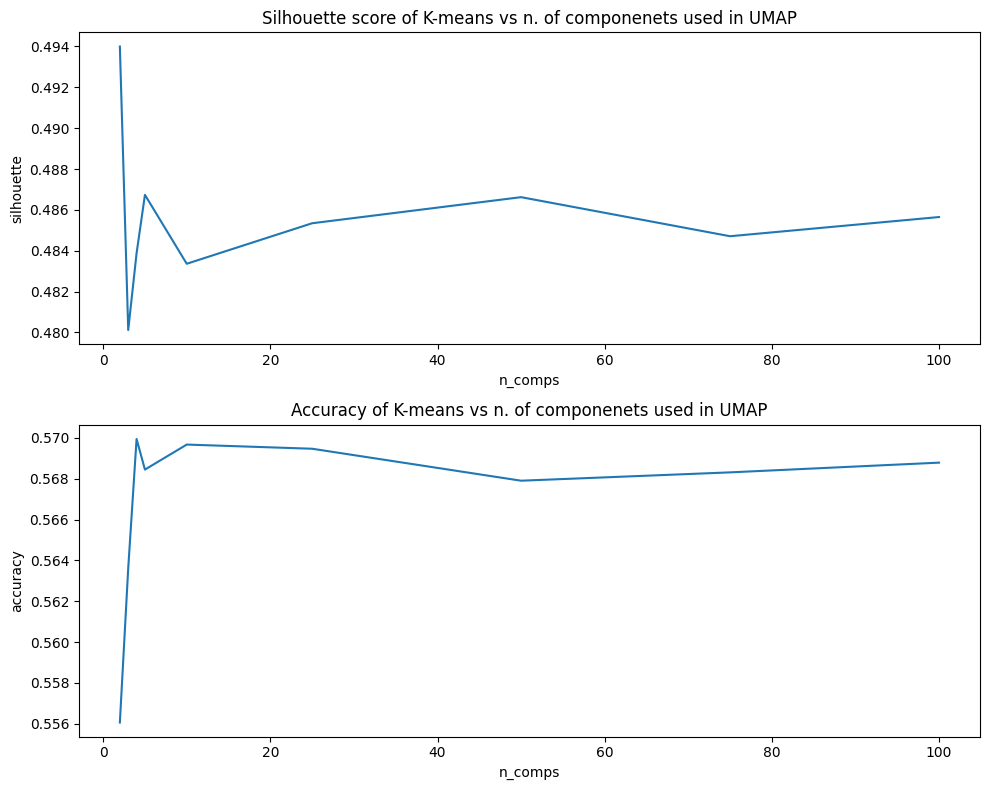

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
#plot accuracy of K-means vs n. of components
sns.lineplot(x="n_comps", y= "silhouette" , data=results_comp_kmeans_H, ax = axes[0])
axes[0].set_title("Silhouette score of K-means vs n. of componenets used in UMAP")
sns.lineplot(x="n_comps", y= "accuracy" , data=results_comp_kmeans_H, ax = axes[1])
axes[1].set_title("Accuracy of K-means vs n. of componenets used in UMAP")
plt.tight_layout()
plt.show()

For k-means, the performance seems to mostly independent of the number of components for the accuracy and instead the silhouette score is maximised for 2/3 components so one might as well use 2 components since they require less storage space and computations

Moreover, despite this notebook is part of the unsupervised analysis of the datasets, we also compute and plot the accuracy for k-means in order to understand whether it would make sense to first cluster the training dataset and then train the predictors based on the matrix of distances from the centroids

## Computing UMAP 2d and 3d embeddings

In [ ]:
print("Computing UMAP 2D...")
umap_2d_HCC = umap.UMAP(
    n_neighbors=11, min_dist=0.204, metric = "correlation",
    n_components=2,
    random_state=42
)
umap_2d_MCF7 = umap.UMAP(
    n_neighbors=11, min_dist=0.204, metric = "correlation",
    n_components=2,
    random_state=42
)
umap_embedding_2d_H = umap_2d_HCC.fit_transform(df_HCC.values)
umap_embedding_2d_M = umap_2d_MCF7.fit_transform(df_MCF7.values)

Computing UMAP 2D...


c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
print("Computing UMAP 3D...")
umap_3d_HCC = umap.UMAP(
    n_neighbors=12, min_dist=1.0, metric = "cosine",
    n_components=3,
    random_state=42
)
umap_3d_MCF7 = umap.UMAP(
    n_neighbors=12, min_dist=1.0, metric = "cosine",
    n_components=3,
    random_state=42
)
umap_embedding_3d_H = umap_3d_HCC.fit_transform(df_HCC.values)
umap_embedding_3d_M = umap_3d_MCF7.fit_transform(df_MCF7.values)

Computing UMAP 3D...


c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\flamo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## ANALYSIS OF DBSCAN WITH HYRBID METRIC

In [ ]:
#based on above findings apply DBSCAN to UMAP emebedding with only two clusters
eps_values = [ 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.9, 1, 1.1]
min_samples_values = [ 5, 10, 25, 50, 75, 100]
results_dbscan_HCC = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(umap_embedding_HCC)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        try:
            core_data = umap_embedding_3d_H[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan
            db_score = np.nan

        results_dbscan_HCC.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
            "accuracy": max(1-accuracy_score(condition_labels_HCC, labels), accuracy_score( condition_labels_HCC, labels)) if n_clusters ==2 else np.nan,
            "score": ((silhouette + 1)/2 + (1-noise_ratio)) if n_clusters >= 2 else 0
        })

results_dbscan_df_H = pd.DataFrame(results_dbscan_HCC)
results_dbscan_df_H.iloc[-20:,:]

eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette  accuracy  \
58  0.7           75           1      117     0.007969         NaN       NaN   
59  0.7          100           1      178     0.012124         NaN       NaN   
60  0.9            5           1        0     0.000000         NaN       NaN   
61  0.9           10           1        0     0.000000         NaN       NaN   
62  0.9           25           1        0     0.000000         NaN       NaN   
63  0.9           50           1        0     0.000000         NaN       NaN   
64  0.9           75           1        0     0.000000         NaN       NaN   
65  0.9          100           1        1     0.000068         NaN       NaN   
66  1.0            5           1        0     0.000000         NaN       NaN   
67  1.0           10           1        0     0.000000         NaN       NaN   
68  1.0           25           1        0     0.000000         NaN       NaN   
69  1.0           50           1        0     0.000000         NaN       NaN   
70  1.0           75           1        0     0.000000         NaN       NaN   
71  1.0          100           1        0     0.000000         NaN       NaN   
72  1.1            5           1        0     0.000000         NaN       NaN   
73  1.1           10           1        0     0.000000         NaN       NaN   
74  1.1           25           1        0     0.000000         NaN       NaN   
75  1.1           50           1        0     0.000000         NaN       NaN   
76  1.1           75           1        0     0.000000         NaN       NaN   
77  1.1          100           1        0     0.000000         NaN       NaN   

    score  
58    0.0  
59    0.0  
60    0.0  
61    0.0  
62    0.0  
63    0.0  
64    0.0  
65    0.0  
66    0.0  
67    0.0  
68    0.0  
69    0.0  
70    0.0  
71    0.0  
72    0.0  
73    0.0  
74    0.0  
75    0.0  
76    0.0  
77    0.0

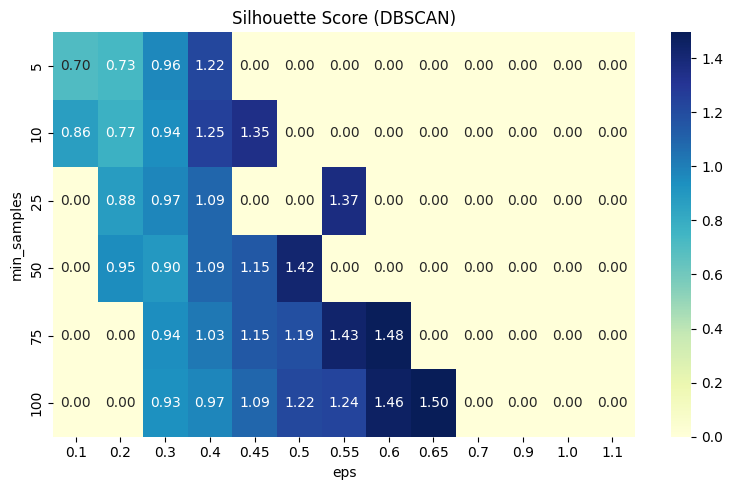

In [ ]:
pivot_sil = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='score')
# pivot_noise = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='noise_ratio')
# pivot_clusters = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='n_clusters')

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# Plot 1: Silhouette Score (DBSCAN)
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes)
axes.set_title('Silhouette Score (DBSCAN)')
axes.set_xlabel('eps')
axes.set_ylabel('min_samples')

plt.tight_layout()
plt.show()

In [ ]:
#Accuracies:
temp_df = results_dbscan_df_H[results_dbscan_df_H['accuracy'].notna()].reset_index(drop=True)
temp_df.head()

eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette  accuracy  \
0  0.30          100           2    14269     0.971870    0.811750  0.990056   
1  0.50           50           2     1539     0.104822    0.049016  0.635540   
2  0.55           25           2      212     0.014439   -0.226645  0.607683   
3  0.55           75           2     1356     0.092358    0.047652  0.631181   
4  0.60           75           2      545     0.037120    0.043152  0.614903   

      score  
0  0.934005  
1  1.419686  
2  1.372238  
3  1.431468  
4  1.484456

In [ ]:
#based on above findings apply DBSCAN to UMAP emebedding with only two clusters
results_dbscan_MC = []
eps_values = [ 0.3, 0.5, 0.7, 0.9, 1, 1.05, 1.1, 1.15, 1.2]
min_samples_values = [ 5, 10, 25, 50, 75, 100]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=8).fit(umap_embedding_MCF7)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)

        try:
            core_data = umap_embedding_3d_M[labels != -1]
            core_labels = labels[labels != -1]
            silhouette = silhouette_score(core_data, core_labels)
        except:
            silhouette = np.nan
            db_score = np.nan

        results_dbscan_MC.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
            "accuracy": max(1-accuracy_score(condition_labels_MCF7, labels), accuracy_score( condition_labels_MCF7, labels)) if n_clusters ==2 else np.nan,
            "score": ((silhouette + 1)/2 + (1-noise_ratio)) if n_clusters >= 2 else 0
        })

results_dbscan_df_MC = pd.DataFrame(results_dbscan_MC)
results_dbscan_df_MC.iloc[-20:,:]

eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette  accuracy  \
34  1.05           75           2     6426     0.297142   -0.233137  0.593684   
35  1.05          100           7    10720     0.495700    0.382817       NaN   
36  1.10            5           1       16     0.000740         NaN       NaN   
37  1.10           10           1       61     0.002821         NaN       NaN   
38  1.10           25           1      563     0.026033         NaN       NaN   
39  1.10           50           1     1999     0.092435         NaN       NaN   
40  1.10           75           1     3587     0.165865         NaN       NaN   
41  1.10          100           2     6334     0.292888   -0.004711  0.591973   
42  1.15            5           1        3     0.000139         NaN       NaN   
43  1.15           10           1        8     0.000370         NaN       NaN   
44  1.15           25           1      197     0.009109         NaN       NaN   
45  1.15           50           1      946     0.043744         NaN       NaN   
46  1.15           75           1     2025     0.093637         NaN       NaN   
47  1.15          100           1     3430     0.158605         NaN       NaN   
48  1.20            5           1        1     0.000046         NaN       NaN   
49  1.20           10           1        2     0.000092         NaN       NaN   
50  1.20           25           1       43     0.001988         NaN       NaN   
51  1.20           50           1      336     0.015537         NaN       NaN   
52  1.20           75           1      971     0.044900         NaN       NaN   
53  1.20          100           1     1822     0.084250         NaN       NaN   

       score  
34  1.086289  
35  1.195709  
36  0.000000  
37  0.000000  
38  0.000000  
39  0.000000  
40  0.000000  
41  1.204756  
42  0.000000  
43  0.000000  
44  0.000000  
45  0.000000  
46  0.000000  
47  0.000000  
48  0.000000  
49  0.000000  
50  0.000000  
51  0.000000  
52  0.000000  
53  0.000000

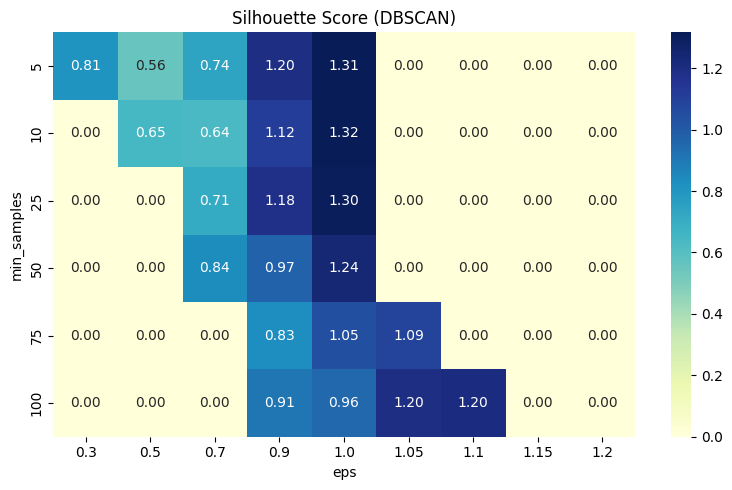

In [ ]:
pivot_sil = results_dbscan_df_MC.pivot(index='min_samples', columns='eps', values='score')
# pivot_noise = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='noise_ratio')
# pivot_clusters = results_dbscan_df_H.pivot(index='min_samples', columns='eps', values='n_clusters')

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# Plot 1: Silhouette Score (DBSCAN)
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes)
axes.set_title('Silhouette Score (DBSCAN)')
axes.set_xlabel('eps')
axes.set_ylabel('min_samples')

plt.tight_layout()
plt.show()

In [ ]:
#Accuracies:
temp_df = results_dbscan_df_MC[results_dbscan_df_H['accuracy'].notna()].reset_index(drop=True)
temp_df.head()

C:\Users\flamo\AppData\Local\Temp\ipykernel_9616\2014883272.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = results_dbscan_df_MC[results_dbscan_df_H['accuracy'].notna()].reset_index(drop=True)


eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette  accuracy  \
0  0.70          100           0    21626     1.000000         NaN       NaN   
1  1.05           50           1     3543     0.163831         NaN       NaN   
2  1.10           25           1      563     0.026033         NaN       NaN   
3  1.10           75           1     3587     0.165865         NaN       NaN   
4  1.15           75           1     2025     0.093637         NaN       NaN   

   score  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

## Silhouette score plots for number of natural clusters (detecting NOISE/OUTLIER analysis)

Using the clustering results of the K-means algorithm with different number of components to evaluate if there is so much noise in the data to form an indpendent cluster (as was, probably mistakenly, suggested a bit by isolation forest)

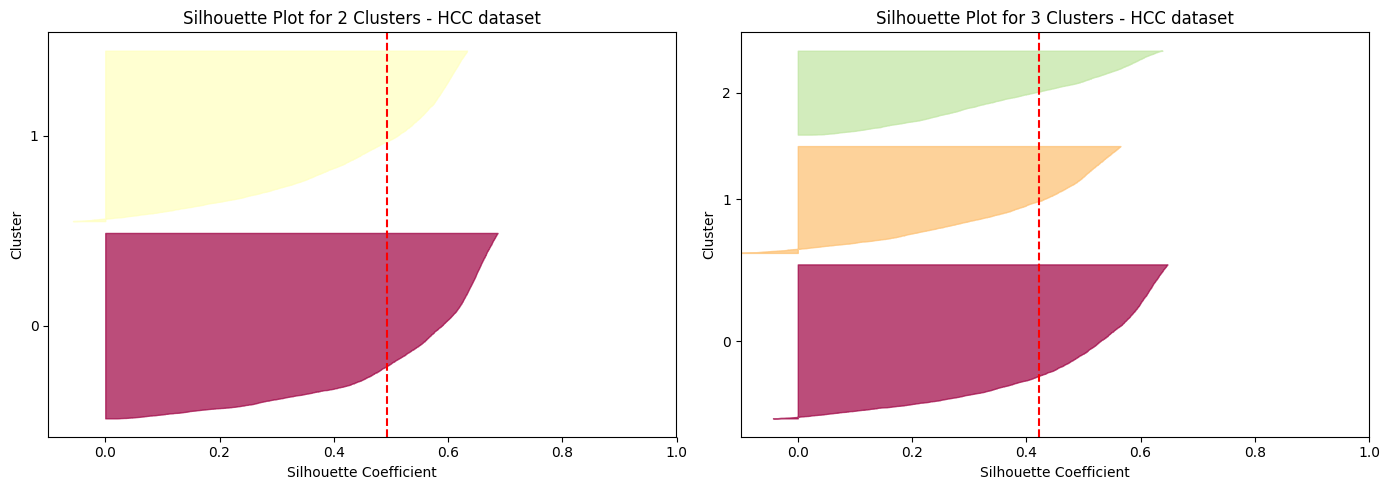

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

# First, define a function to plot silhouette for a given number of clusters
def plot_silhouette(ax, embedding, n_clusters, title_suffix=""):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=5, random_state=20).fit(embedding)
    labels = kmeans.labels_
    silhouette_coefficients = silhouette_samples(embedding, labels)
    avg_score = silhouette_score(embedding, labels)

    # Only one plot since you have k clusters
    padding = len(embedding) // 30
    pos = padding
    ticks = []

    for i in range(n_clusters):
        coeffs = silhouette_coefficients[labels == i]
        coeffs.sort()
        color = plt.cm.Spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Customize axis
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(n_clusters)))
    ax.set_ylabel("Cluster")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters - HCC dataset")
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_xlim([-0.1, 1])

# Create subplots for 2 and 3 clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Assuming `umap_embedding_3d_H` is defined
plot_silhouette(ax1, umap_embedding_2d_H, 2)
plot_silhouette(ax2, umap_embedding_2d_H, 3)

plt.tight_layout()
plt.show()

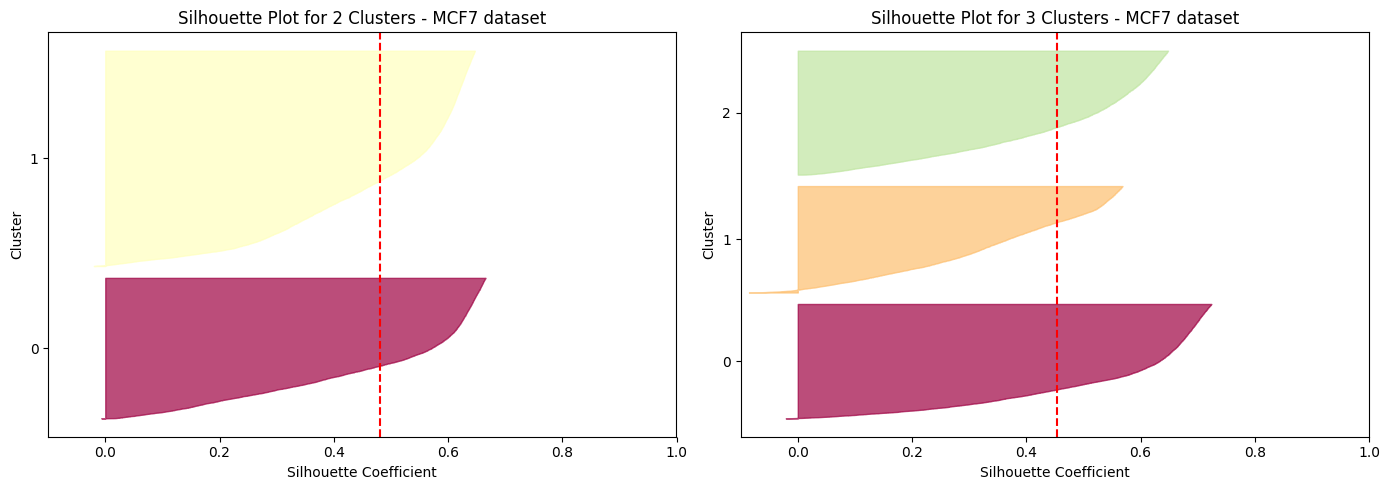

In [ ]:
# First, define a function to plot silhouette for a given number of clusters
def plot_silhouette(ax, embedding, n_clusters, title_suffix=""):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=5, random_state=20).fit(embedding)
    labels = kmeans.labels_
    silhouette_coefficients = silhouette_samples(embedding, labels)
    avg_score = silhouette_score(embedding, labels)

    # Only one plot since you have k clusters
    padding = len(embedding) // 30
    pos = padding
    ticks = []

    for i in range(n_clusters):
        coeffs = silhouette_coefficients[labels == i]
        coeffs.sort()
        color = plt.cm.Spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Customize axis
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(n_clusters)))
    ax.set_ylabel("Cluster")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters - MCF7 dataset")
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_xlim([-0.1, 1])

# Create subplots for 2 and 3 clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Assuming `umap_embedding_3d_H` is defined
plot_silhouette(ax1, umap_embedding_2d_M, 2)
plot_silhouette(ax2, umap_embedding_2d_M, 3)

plt.tight_layout()
plt.show()

# Visualisation of predicted and true clusters after UMAP

In [ ]:
#best clustering algorithms on UMAP
dbscan_H_umap = DBSCAN(eps=0.6, min_samples=75, n_jobs=8).fit(umap_embedding_HCC)
labels_dbscan_H = dbscan_H_umap.labels_
colors_dbscan_H = ["green" if c == 0 else "yellow" if c == 1 else "black" for c in labels_dbscan_H]

dbscan_M_umap = DBSCAN(eps=1, min_samples=25, n_jobs=8).fit(umap_embedding_MCF7)
labels_dbscan_M = dbscan_M_umap.labels_
colors_dbscan_M = ["green" if c == 0 else "yellow" if c == 1 else "black" for c in labels_dbscan_M]


kmeans_H_umap = KMeans(n_clusters=2, init= "k-means++", n_init= 5, random_state=20).fit(umap_embedding_HCC)
labels_kmeans_H = kmeans_H_umap.labels_
colors_kmeans_H = ["green" if c == 0 else "yellow" if c == 1 else "black" for c in labels_kmeans_H]

kmeans_M_umap = KMeans(n_clusters=2, init= "k-means++", n_init= 1, random_state=20).fit(umap_embedding_MCF7)
labels_kmeans_M = kmeans_M_umap.labels_
colors_kmeans_M = ["green" if c == 0 else "yellow" if c == 1 else "black" for c in labels_kmeans_M]

In [ ]:
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=12, label='Norm'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=12, label='Hypo')
]

In [ ]:
legend_elements_2 = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=12, label='Cluster 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=12, label='Cluster 2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=12, label='Noise')
]

In [ ]:
legend_elements_3 = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=12, label='Cluster 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=12, label='Cluster 2'),
]

## DBSCAN

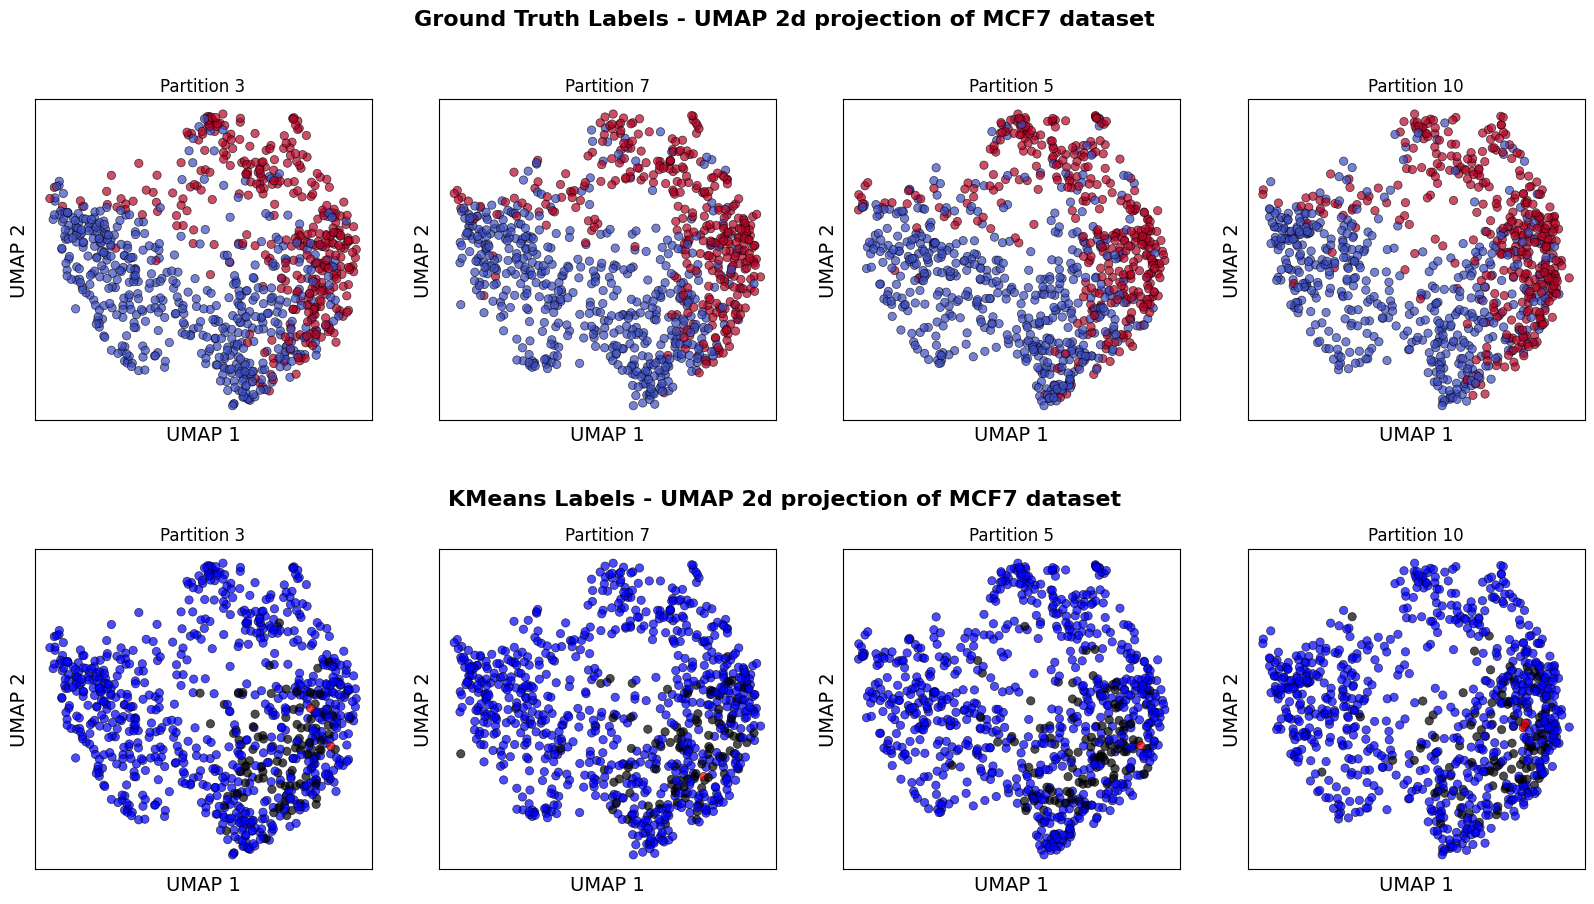

In [ ]:
import random
import matplotlib.gridspec as gridspec

random.seed(32)

splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_MCF7.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 2d projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 2d projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j])
    part = np.array(partitions[idx], dtype=int)

    ax.scatter(umap_embedding_2d_M[part, 0], umap_embedding_2d_M[part, 1],
               c=np.array(condition_labels_MCF7)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# Plot second row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j])
    part = np.array(partitions[idx], dtype=int)

    colors = []
    for label in labels_dbscan_M[part]:
        if label == 0:
            colors.append('blue')
        elif label == 1:
            colors.append('red')
        else:
            colors.append('black')

    ax.scatter(umap_embedding_2d_M[part, 0], umap_embedding_2d_M[part, 1],
               c=colors,
               alpha=0.7, edgecolor='k', linewidth=0.5)

    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

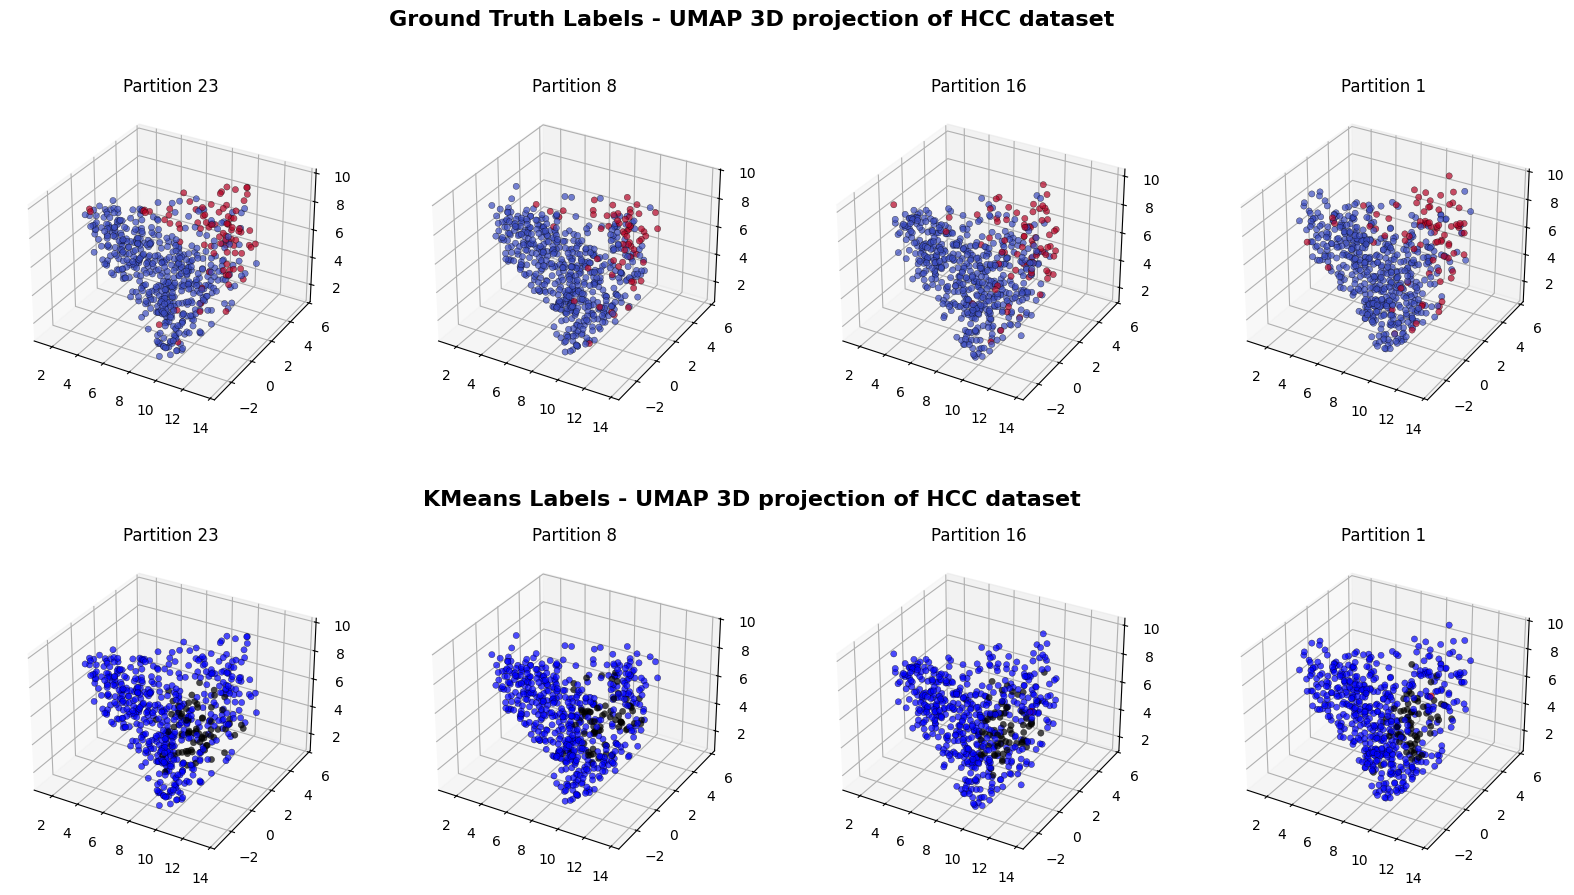

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_HCC.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row (ground truth labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_M[part, 0],
                         umap_embedding_3d_M[part, 1],
                         umap_embedding_3d_M[part, 2],
                         c=np.array(condition_labels_MCF7)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


# Plot second row (k-means labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)

    colors = []
    for label in labels_dbscan_M[part]:
        if label == 0:
            colors.append('blue')
        elif label == 1:
            colors.append('red')
        else:
            colors.append('black')

    scatter = ax.scatter(umap_embedding_3d_M[part, 0],
                         umap_embedding_3d_M[part, 1],
                         umap_embedding_3d_M[part, 2],
                         c=colors,
                         alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


plt.show()

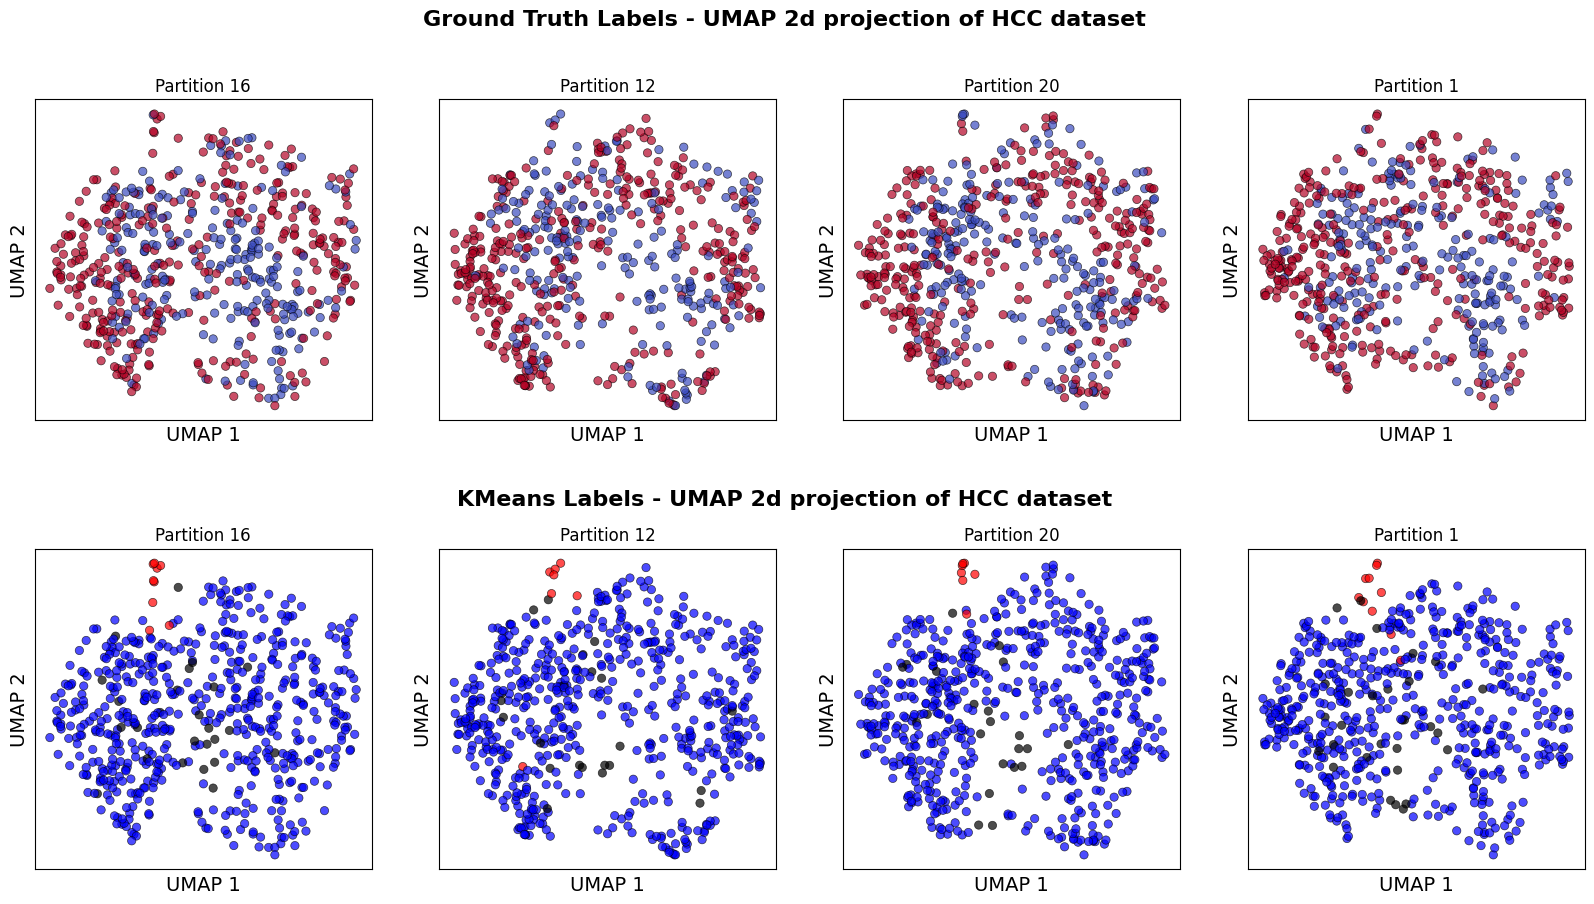

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_HCC.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 2d projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 2d projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j])
    part = np.array(partitions[idx], dtype=int)
    ax.scatter(umap_embedding_2d_H[part, 0], umap_embedding_2d_H[part, 1],
               c=np.array(condition_labels_HCC)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# Plot second row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j])
    part = np.array(partitions[idx], dtype=int)

    colors = []
    for label in labels_dbscan_H[part]:
        if label == 0:
            colors.append('blue')
        elif label == 1:
            colors.append('red')
        else:
            colors.append('black')

    ax.scatter(umap_embedding_2d_H[part, 0], umap_embedding_2d_H[part, 1],
               c=colors, alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

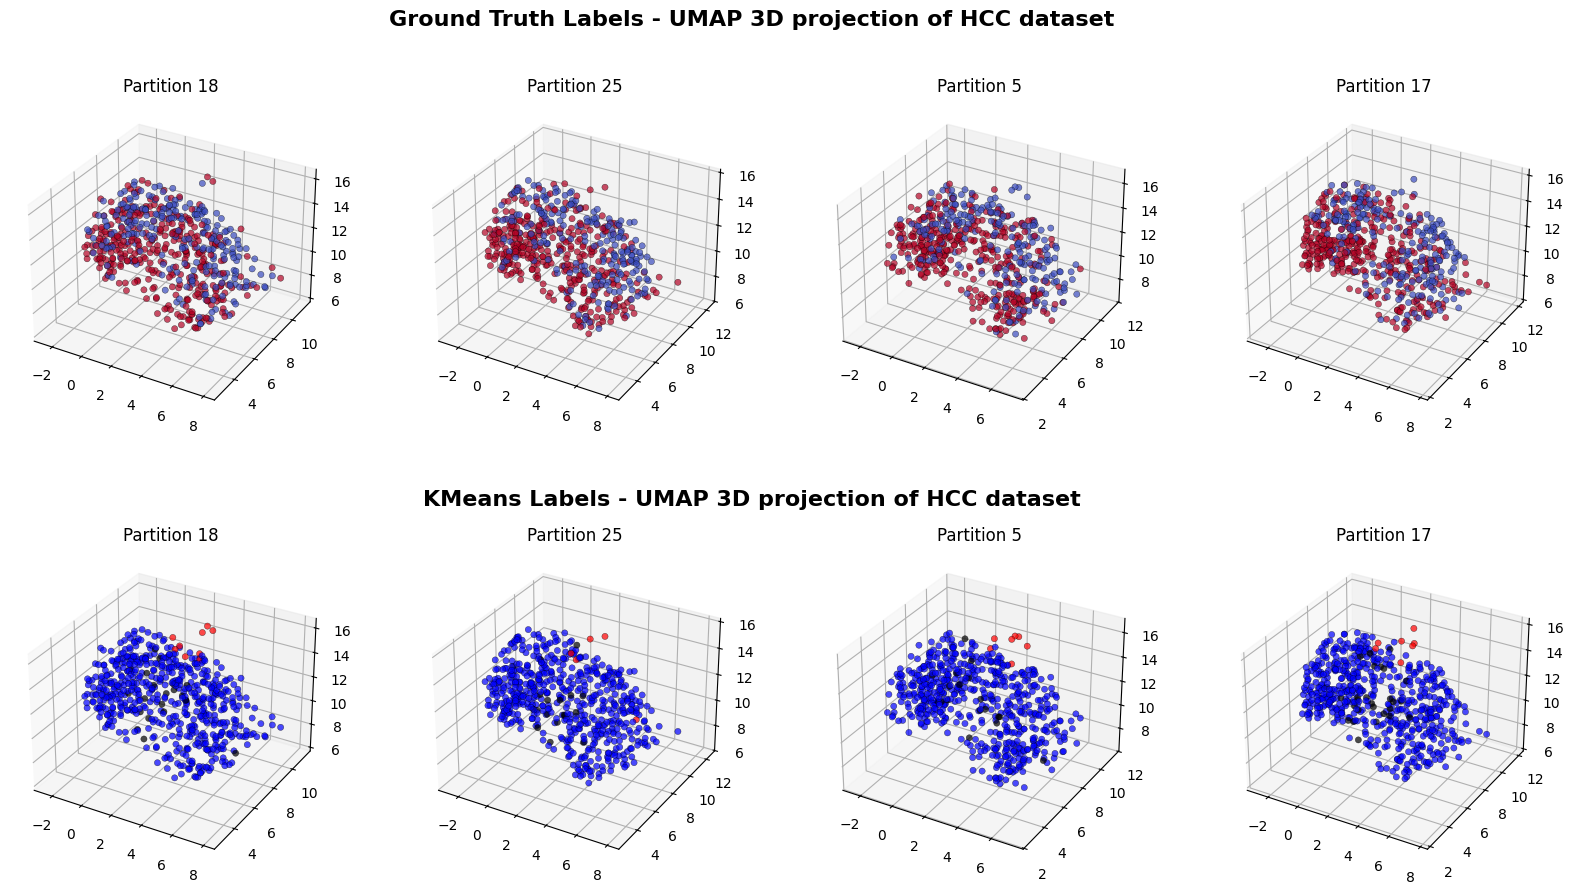

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_HCC.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row (ground truth labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_H[part, 0],
                         umap_embedding_3d_H[part, 1],
                         umap_embedding_3d_H[part, 2],
                         c=np.array(condition_labels_HCC)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


# Plot second row (k-means labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)

    colors = []
    for label in labels_dbscan_H[part]:
        if label == 0:
            colors.append('blue')
        elif label == 1:
            colors.append('red')
        else:
            colors.append('black')

    scatter = ax.scatter(umap_embedding_3d_H[part, 0],
                         umap_embedding_3d_H[part, 1],
                         umap_embedding_3d_H[part, 2],
                         c=colors, alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')

plt.show()

## K-MEANS

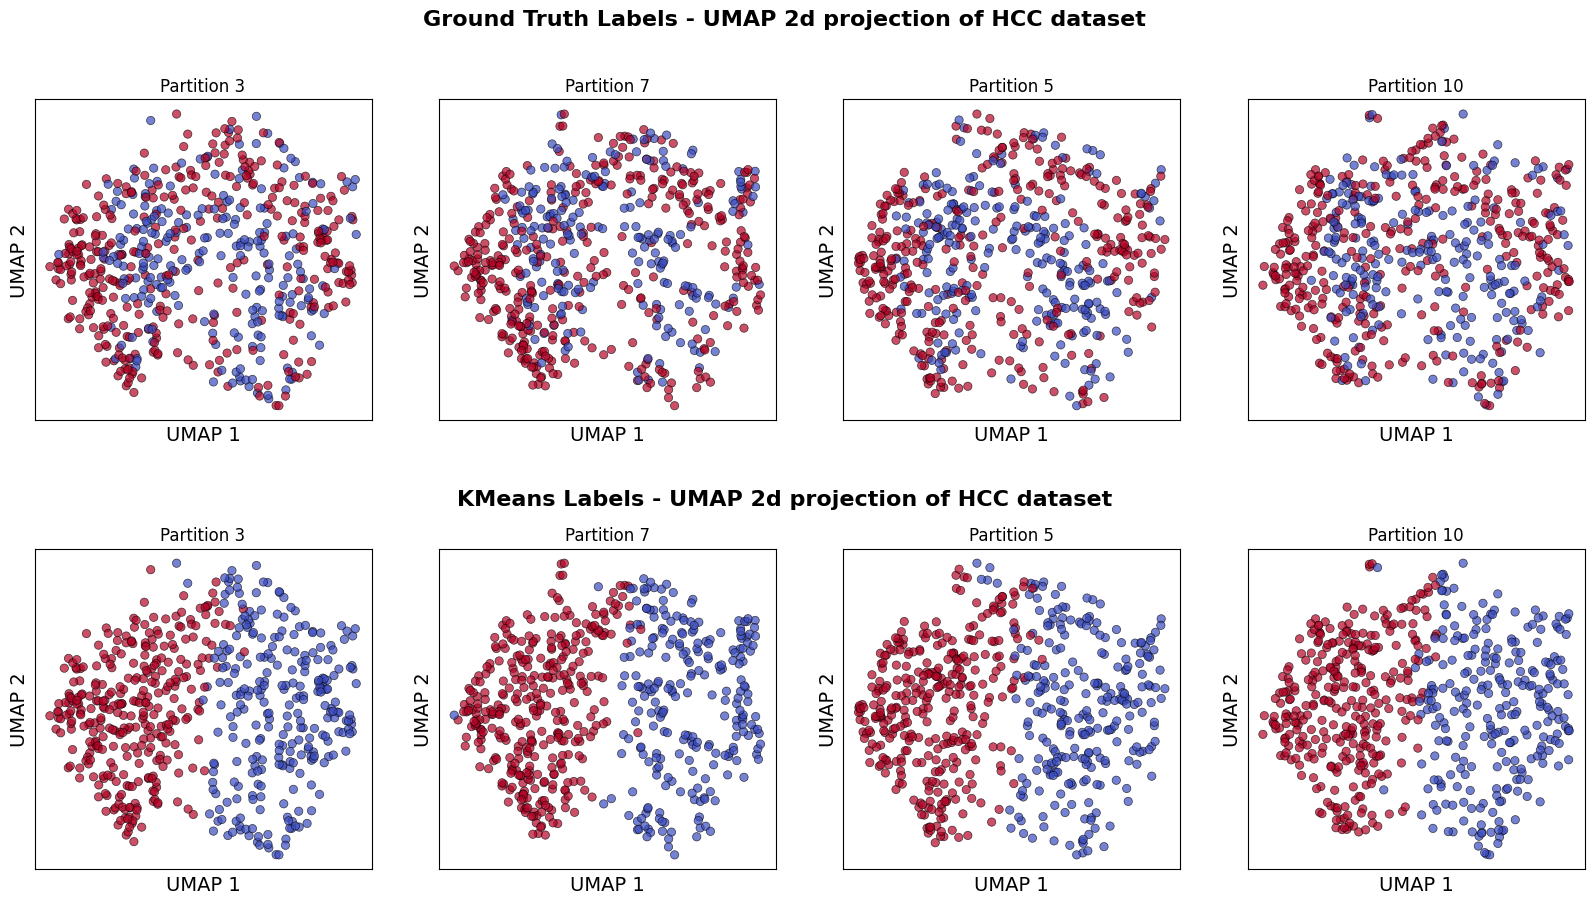

In [ ]:
import random
import matplotlib.gridspec as gridspec

random.seed(32)

splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_HCC.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 2d projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 2d projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j])
    part = np.array(partitions[idx], dtype=int)
    ax.scatter(umap_embedding_2d_H[part, 0], umap_embedding_2d_H[part, 1],
               c=np.array(condition_labels_HCC)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# Plot second row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j])
    part = np.array(partitions[idx], dtype=int)

    ax.scatter(umap_embedding_2d_H[part, 0], umap_embedding_2d_H[part, 1],
               c=np.array(1-labels_kmeans_H)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

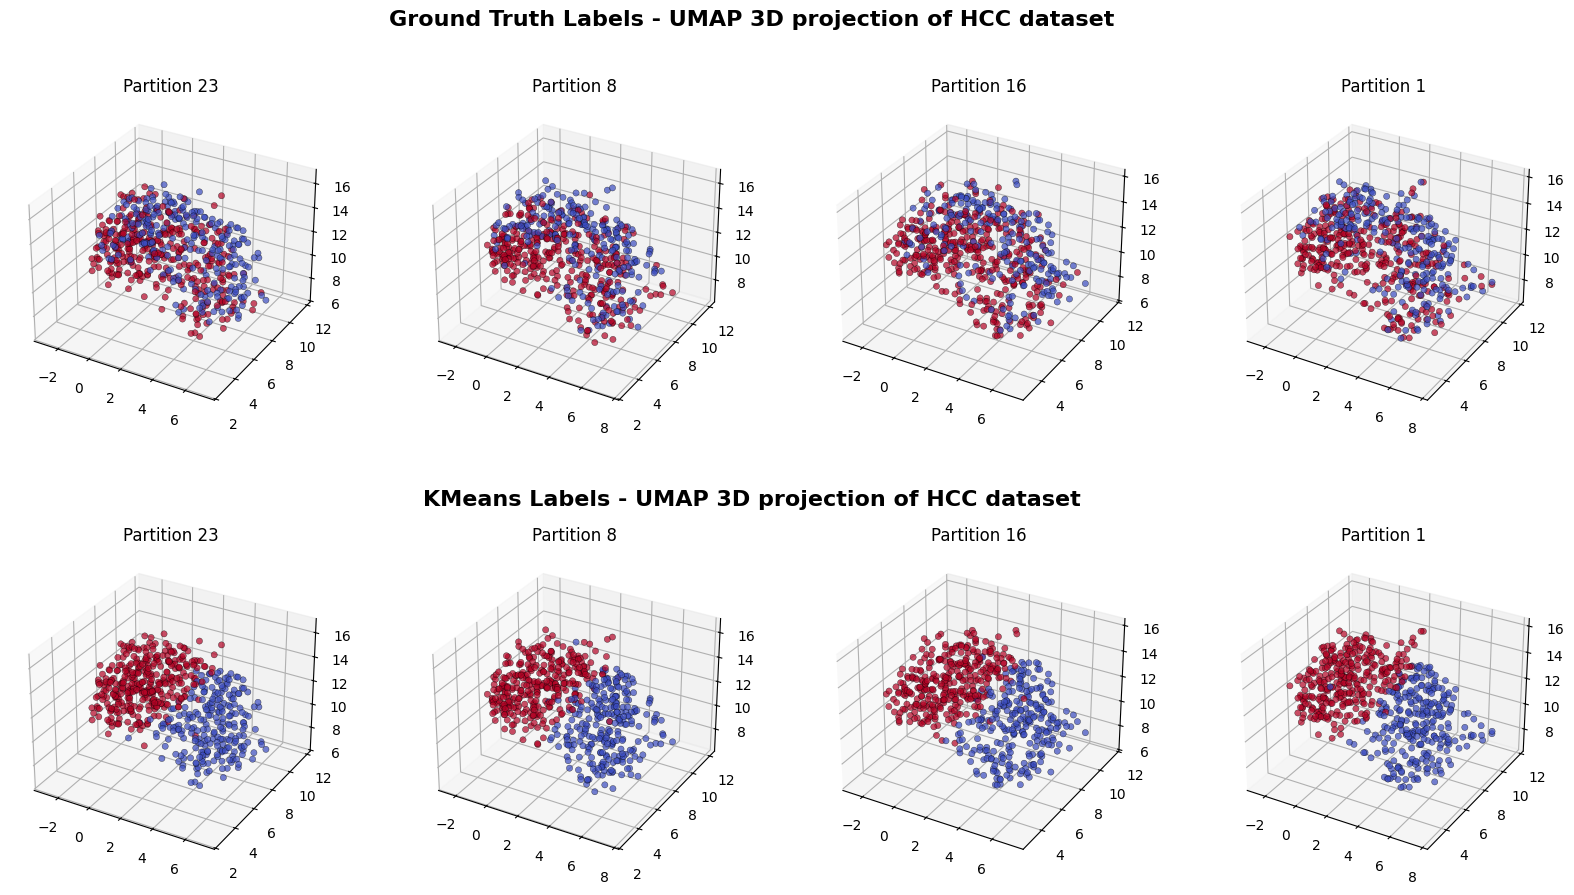

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_HCC.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 3D projection of HCC dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row (ground truth labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_H[part, 0],
                         umap_embedding_3d_H[part, 1],
                         umap_embedding_3d_H[part, 2],
                         c=np.array(condition_labels_HCC)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


# Plot second row (k-means labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_H[part, 0],
                         umap_embedding_3d_H[part, 1],
                         umap_embedding_3d_H[part, 2],
                         c=np.array(1 - labels_kmeans_H)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


plt.show()

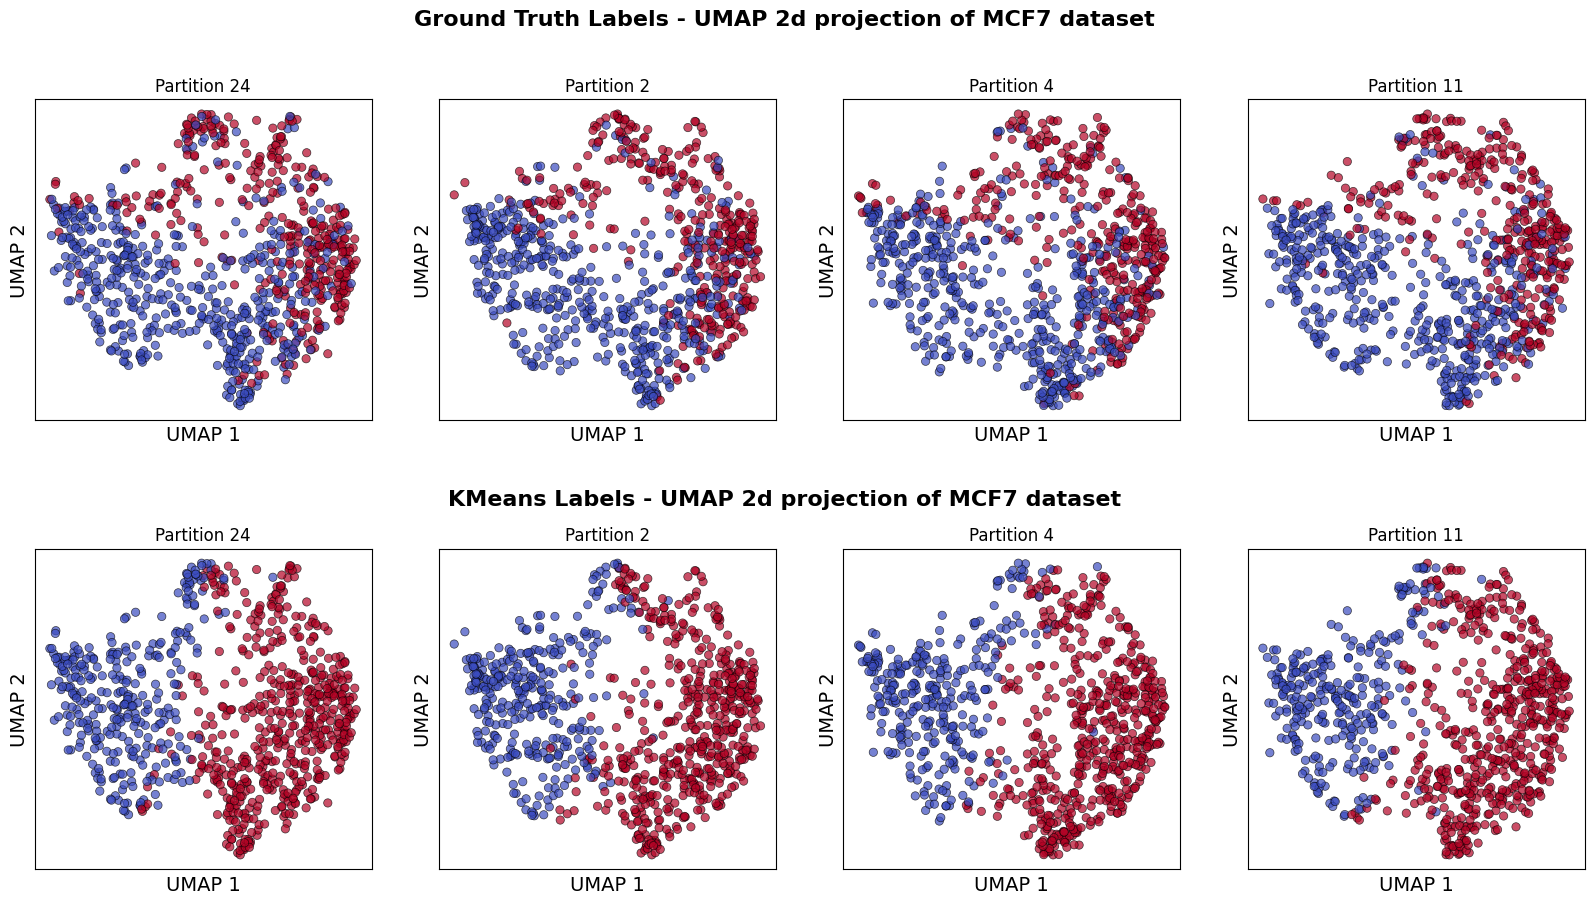

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_MCF7.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 2d projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 2d projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j])
    part = np.array(partitions[idx], dtype=int)
    ax.scatter(umap_embedding_2d_M[part, 0], umap_embedding_2d_M[part, 1],
               c=np.array(condition_labels_MCF7)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# Plot second row
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j])
    part = np.array(partitions[idx], dtype=int)
    ax.scatter(umap_embedding_2d_M[part, 0], umap_embedding_2d_M[part, 1],
               c=np.array(labels_kmeans_M)[part], cmap='coolwarm',
               alpha=0.7, edgecolor='k', linewidth=0.5)
    ax.set_title(f'Partition {idx+1}')
    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

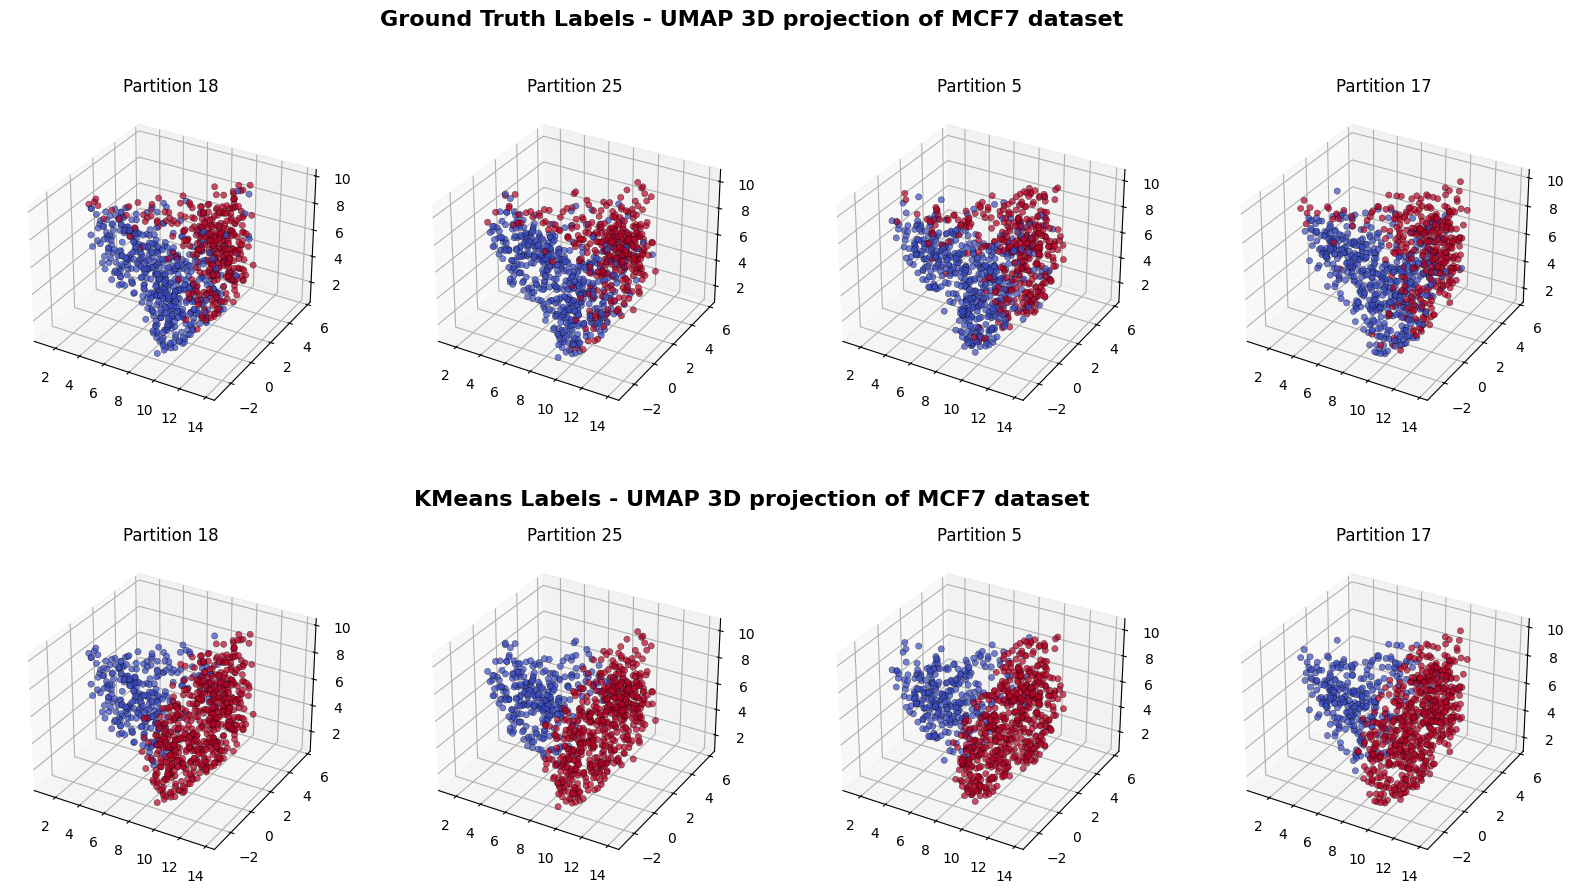

In [ ]:
splits = 25
selected_indices = random.sample(range(splits), 4)
indices = np.arange(df_MCF7.shape[0])
np.random.shuffle(indices)
partitions = np.array_split(indices, splits)

# Create figure and gridspec with space between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, len(selected_indices), height_ratios=[1, 1], hspace=0.4)

# Add title ABOVE the first row
fig.text(0.5, 0.96, 'Ground Truth Labels - UMAP 3D projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Add title BELOW the first row (above second row)
fig.text(0.5, 0.48, 'KMeans Labels - UMAP 3D projection of MCF7 dataset',
         ha='center', va='center', fontsize=16, fontweight='bold')

# Plot first row (ground truth labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[0, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_M[part, 0],
                         umap_embedding_3d_M[part, 1],
                         umap_embedding_3d_M[part, 2],
                         c=np.array(condition_labels_MCF7)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


# Plot second row (k-means labels)
for j, idx in enumerate(selected_indices):
    ax = fig.add_subplot(gs[1, j], projection='3d')
    part = np.array(partitions[idx], dtype=int)
    scatter = ax.scatter(umap_embedding_3d_M[part, 0],
                         umap_embedding_3d_M[part, 1],
                         umap_embedding_3d_M[part, 2],
                         c=np.array(labels_kmeans_M)[part],
                         cmap='coolwarm', alpha=0.7, edgecolor='k', linewidth=0.3, s=20)
    ax.set_title(f'Partition {idx+1}')


plt.show()